In [78]:
import numpy as np
from sklearn.linear_model import LinearRegression

X = np.array([[1,1], [1,2], [2,2,], [2,3]])
y = np.dot(X, np.array([1,2])) + 3
model = LinearRegression().fit(X, y)

print(f"sklearn coef:\t {model.coef_}, intercept:\t {model.intercept_}")

a = np.ones((len(X), 1))
X = np.concatenate([a, X], axis=1)
transpose_X = np.transpose(X)
_inverse = np.linalg.inv(np.dot(transpose_X, X))
_inverse = np.dot(_inverse, transpose_X)
res = np.dot(_inverse, y)
print(f'手动实现coef:\t {res[1:]}, intercept:\t {res[0]}')

sklearn coef:	 [1. 2.], intercept:	 3.0000000000000018
手动实现coef:	 [1. 2.], intercept:	 3.0


In [79]:
import pandas as pd
from functools import partial

p = partial(print, end='\n----------------\n')

p(pd.to_datetime('2022-1-2'))
p(pd.to_datetime('12/09/2024'))
p(pd.to_datetime(['2024-1-1', '2023-2-3', '2021-2-1']))

2022-01-02 00:00:00
----------------
2024-12-09 00:00:00
----------------
DatetimeIndex(['2024-01-01', '2023-02-03', '2021-02-01'], dtype='datetime64[ns]', freq=None)
----------------


In [80]:
data = {
    'A': [1,2,333],
    'B': [2231,123123,0]
}
df = pd.DataFrame(data)
p(df)
df = df.set_index('A')
p(df)

     A       B
0    1    2231
1    2  123123
2  333       0
----------------
          B
A          
1      2231
2    123123
333       0
----------------


In [81]:
data = {
    'name': ['as', 'kk', 'tom', 'cat', 'andy'],
    'score': [1,200,33,66,99]
}

df = pd.DataFrame(data).set_index('name').sort_values('score')
p(df)
p(df.sort_values('score', ascending=False))

      score
name       
as        1
tom      33
cat      66
andy     99
kk      200
----------------
      score
name       
kk      200
andy     99
cat      66
tom      33
as        1
----------------


In [82]:
p(df)
p(df.shift(2))
p(df.shift(1, axis='columns'))

      score
name       
as        1
tom      33
cat      66
andy     99
kk      200
----------------
      score
name       
as      NaN
tom     NaN
cat     1.0
andy   33.0
kk     66.0
----------------
      score
name       
as      NaN
tom     NaN
cat     NaN
andy    NaN
kk      NaN
----------------


In [93]:
df2 = df.copy()
df2 = df2.shift(2)
p(df2)
p(df2.dropna())

      score
name       
as      NaN
tom     NaN
cat     1.0
andy   33.0
kk     66.0
----------------
      score
name       
cat     1.0
andy   33.0
kk     66.0
----------------


In [98]:
df = pd.read_csv('000001.csv')
p(np.shape(df))
df.head()

(611, 14)
----------------


,date,open,high,close,low,volume,price_change,p_change,ma5,ma10,ma20,v_ma5,v_ma10,v_ma20
0,2019/5/30,12.32,12.38,12.22,12.11,646284.62,-0.18,-1.45,12.366,12.390,12.579,747470.29,739308.42,953969.39
1,2019/5/29,12.36,12.59,12.40,12.26,666411.50,-0.09,-0.72,12.380,12.453,12.673,751584.45,738170.10,973189.95
2,2019/5/28,12.31,12.55,12.49,12.26,880703.12,0.12,0.97,12.380,12.505,12.742,719548.29,781927.80,990340.43
3,2019/5/27,12.21,12.42,12.37,11.93,1048426.00,0.02,0.16,12.394,12.505,12.824,689649.77,812117.30,1001879.10
4,2019/5/24,12.35,12.45,12.35,12.31,495526.19,0.06,0.49,12.396,12.498,12.928,637251.61,781466.47,1046943.98


In [100]:
df['date'] = pd.to_datetime(df['date'])
df.set_index('date', inplace=True)
df.head()

,open,high,close,low,volume,price_change,p_change,ma5,ma10,ma20,v_ma5,v_ma10,v_ma20
date,,,,,,,,,,,,,
2019-05-30,12.32,12.38,12.22,12.11,646284.62,-0.18,-1.45,12.366,12.390,12.579,747470.29,739308.42,953969.39
2019-05-29,12.36,12.59,12.40,12.26,666411.50,-0.09,-0.72,12.380,12.453,12.673,751584.45,738170.10,973189.95
2019-05-28,12.31,12.55,12.49,12.26,880703.12,0.12,0.97,12.380,12.505,12.742,719548.29,781927.80,990340.43
2019-05-27,12.21,12.42,12.37,11.93,1048426.00,0.02,0.16,12.394,12.505,12.824,689649.77,812117.30,1001879.10
2019-05-24,12.35,12.45,12.35,12.31,495526.19,0.06,0.49,12.396,12.498,12.928,637251.61,781466.47,1046943.98


In [101]:
# 删除有缺失值的列
df.dropna(inplace=True)
df.isna().sum()

open            0
high            0
close           0
low             0
volume          0
price_change    0
p_change        0
ma5             0
ma10            0
ma20            0
v_ma5           0
v_ma10          0
v_ma20          0
dtype: int64

In [102]:
min_date = df.index.min()
max_date = df.index.max()
print(f'First date: {min_date}')
print(f'Last date: {max_date}')

First date: 2016-11-29 00:00:00
Last date: 2019-05-30 00:00:00


In [105]:
DELTA_DAY = 5
df['label'] = df['close'].shift(DELTA_DAY)
df.dropna(inplace=True)
df.tail(10)

,open,high,close,low,volume,price_change,p_change,ma5,ma10,ma20,v_ma5,v_ma10,v_ma20,label
date,,,,,,,,,,,,,,
2016-12-12,9.65,9.77,9.50,9.44,1256874.00,-0.15,-1.55,9.528,9.542,9.542,907766.59,869263.18,869263.18,9.20
2016-12-09,9.50,9.75,9.65,9.48,1514199.25,0.13,1.37,9.520,9.547,9.547,809264.93,826195.31,826195.31,9.25
2016-12-08,9.50,9.55,9.52,9.43,671452.19,0.04,0.42,9.500,9.534,9.534,672362.38,740194.81,740194.81,9.25
2016-12-07,9.48,9.49,9.48,9.41,493404.75,-0.01,-0.10,9.516,9.536,9.536,667272.81,750015.19,750015.19,9.40
2016-12-06,9.48,9.52,9.49,9.45,602902.75,0.03,0.32,9.530,9.545,9.545,773784.48,792783.60,792783.60,9.42
2016-12-05,9.50,9.54,9.46,9.41,764365.69,-0.09,-0.94,9.556,9.556,9.556,830759.76,830759.76,830759.76,9.50
2016-12-02,9.60,9.60,9.55,9.44,829686.50,-0.05,-0.52,9.580,9.580,9.580,847358.28,847358.28,847358.28,9.65
2016-12-01,9.57,9.63,9.60,9.55,646004.38,0.05,0.52,9.590,9.590,9.590,853248.88,853248.88,853248.88,9.52
2016-11-30,9.65,9.72,9.55,9.50,1025963.06,-0.07,-0.73,9.585,9.585,9.585,956871.13,956871.13,956871.13,9.48


In [126]:
X = df.drop(['price_change', 'label', 'p_change'], axis=1)
X = X.values

from sklearn.preprocessing import scale
X = scale(X)
y = df.label.values

In [127]:
p(np.shape(X), np.shape(y))

(606, 11) (606,)
----------------


In [128]:
X_train, y_train = X[0:550, :], y[0:550]
X_test, y_test = X[550:606, :], y[550:606]
p(X_train.shape)
p(y_train.shape)
p(X_test.shape)
p(y_test.shape)

(550, 11)
----------------
(550,)
----------------
(56, 11)
----------------
(56,)
----------------


In [129]:
from sklearn.linear_model import LinearRegression

lr = LinearRegression().fit(X_train,y_train)
lr.score(X_test, y_test)

-0.3184468725228846

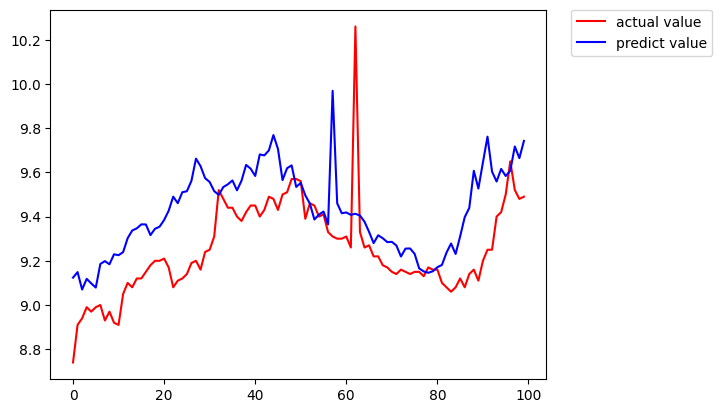

In [132]:
x_predict = X[-100:]
forcast = lr.predict(x_predict)

import matplotlib.pyplot as plt

plt.plot(y[-100:], color='r', label='actual value')
plt.plot(forcast, color='b', label='predict value')
plt.legend(bbox_to_anchor=(1.05,1), loc='upper left', borderaxespad=0.)
plt.show()